In [ ]:
#install gitpython to access git repository data and to get covid data
!pip install gitpython
import pandas as pd
import os
from git.repo import Repo #Imports the Repo class from the git.repo module
import matplotlib.pyplot as plt
import geopandas as gpd # Imports the GeoPandas library for working with geospatial data.
import urllib # imports the urllib module for working with URLs.
import shutil #  Imports the shutil module for file operations.
%matplotlib inline

In [ ]:
# Download the covid datadata
covidfolder = '../../data_external/covid19'

In [ ]:

# Check the specified folder path exists on the local system
if os.path.isdir(covidfolder):
    # If the folder exists, open the Git repository in the specified path
    repo = Repo(covidfolder)
    repo.remotes.origin.pull()
else:# If the folder does not exist, clone the COVID-19 Git repository from the specified URL
    repo = Repo.clone_from('https://github.com/CSSEGISandData/COVID-19.git', covidfolder)
    # Here, 'https://github.com/CSSEGISandData/COVID-19.git' is the URL of the remote Git repository.

In [ ]:
# containing confirmed COVID-19 cases in the United States.
datadir = os.path.join(covidfolder, 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')

# The os.path.join() function constructs the complete file path by joining

In [ ]:
covid_data = pd.read_csv(datadir)#define the covid data

In [ ]:
# Extract the date columns and cases for Oregon, Washington, and California
# from the filtered COVID-19 data.
# Filter the data for Oregon, Washington, and California
oregon_data = covid_data[covid_data['Province_State'] == 'Oregon']
washington_data = covid_data[covid_data['Province_State'] == 'Washington']
california_data = covid_data[covid_data['Province_State'] == 'California']

# Extract the date columns and cases for each state
oregon_cases = oregon_data.iloc[:, 11:]
washington_cases = washington_data.iloc[:, 11:]
california_cases = california_data.iloc[:, 11:]

# Convert the date columns to datetime objects
dates = pd.to_datetime(oregon_cases.columns)

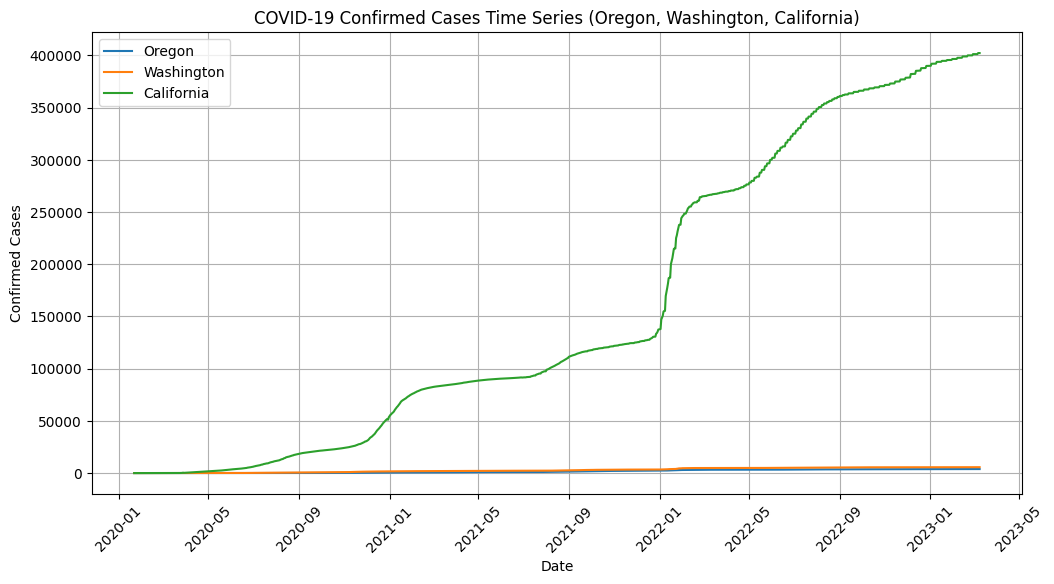

In [ ]:

plt.figure(figsize=(12, 6))  #Plot the time series of confirmed covid case Set the figure size for the plot

# Plot the data for Oregon, Washington, and California
plt.plot(dates, oregon_cases.iloc[0], label='Oregon')  # Plot Oregon's data
plt.plot(dates, washington_cases.iloc[0], label='Washington')  # Plot Washington's data
plt.plot(dates, california_cases.iloc[0], label='California')  # Plot California's data

# Set plot title and axis labels
plt.title('COVID-19 Confirmed Cases Time Series (Oregon, Washington, California)')  # Set the plot title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Confirmed Cases')  # Set the y-axis label
plt.legend()  # Add legend to the plot
plt.grid(True)  # Add gridlines to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()